In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
import lightgbm as lgb
import warnings

In [2]:
df = pd.read_csv("AB_NYC_2019.csv")

In [3]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [4]:
df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


In [5]:
df.tail(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [7]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [8]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


Price Distribution:


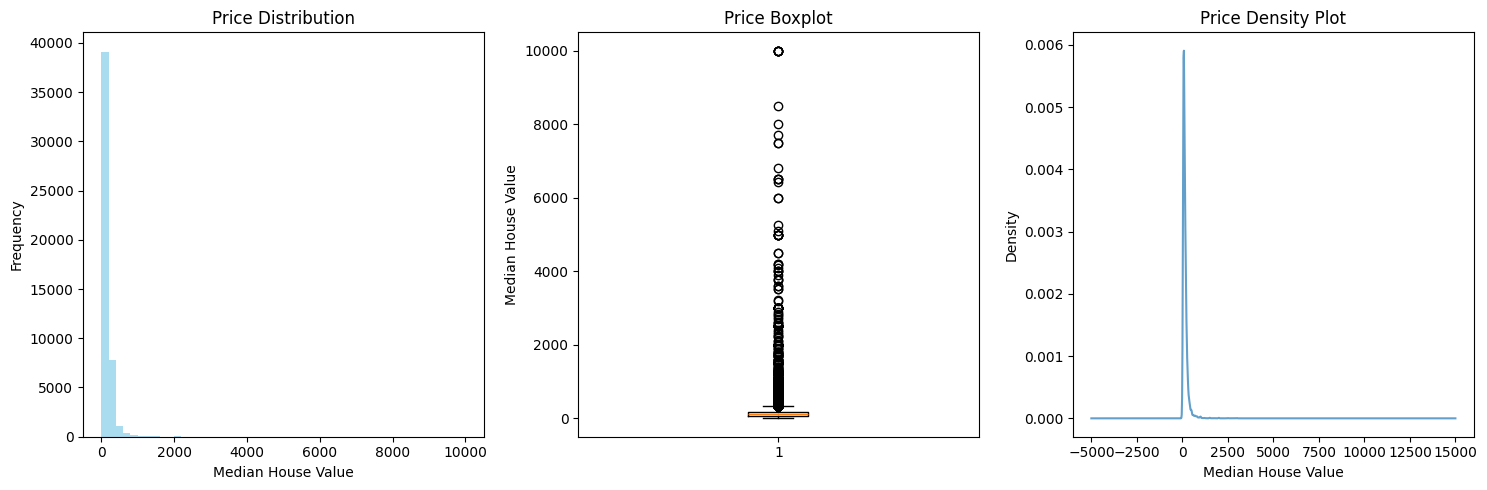

In [9]:
print("\nPrice Distribution:")
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(df['price'], bins=50, alpha=0.7, color='skyblue')
plt.title('Price Distribution')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.boxplot(df['price'])
plt.title('Price Boxplot')
plt.ylabel('Median House Value')

plt.subplot(1, 3, 3)
df['price'].plot(kind='kde', alpha=0.7)
plt.title('Price Density Plot')
plt.xlabel('Median House Value')

plt.tight_layout()
plt.show()

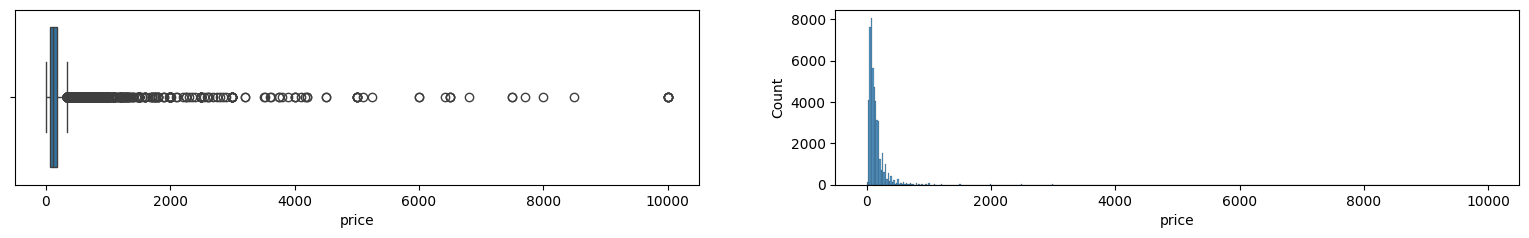

One's with 0: 176
One's greater than a rice person would pay: 16704


In [10]:
plt.figure(figsize=(30, 5))
plt.subplot(2, 3, 1)
sns.boxplot(x='price',data=df)
plt.subplot(2,3,2)
sns.histplot(x='price',data=df)
plt.show()


print(f"One's with 0: {df.loc[df['price'] == 0].size}")
print(f"One's greater than a rice person would pay: {df.loc[df['price'] > 500].size}")

### Data Cleaning

In [11]:
df.drop(df[df['price'] == 0].index, inplace=True)
df.drop(df.loc[df['price'] > 300].index,inplace=True)
df.drop(columns=['id','host_id','name','host_name','neighbourhood','last_review'],inplace=True)
df.fillna({'reviews_per_month': 0}, inplace=True)
df

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,Brooklyn,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,40.67853,-73.94995,Private room,70,2,0,0.00,2,9
48891,Brooklyn,40.70184,-73.93317,Private room,40,4,0,0.00,2,36
48892,Manhattan,40.81475,-73.94867,Entire home/apt,115,10,0,0.00,1,27
48893,Manhattan,40.75751,-73.99112,Shared room,55,1,0,0.00,6,2


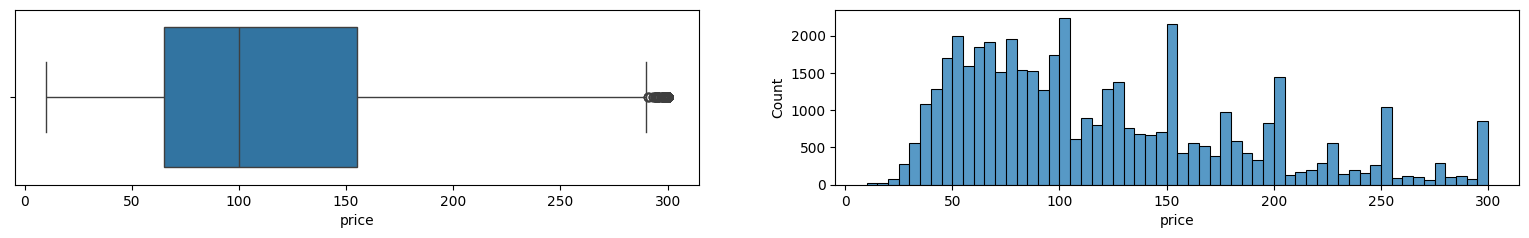

In [12]:
plt.figure(figsize=(30, 5))
plt.subplot(2, 3, 1)
sns.boxplot(x='price',data=df)
plt.subplot(2,3,2)
sns.histplot(x='price',data=df)
plt.show()

In [13]:
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    print('-'*60)
    print(f"Column: {df[col].value_counts()}")
    print(f"unique: {df[col].unique()}")

------------------------------------------------------------
Column: neighbourhood_group
Brooklyn         19329
Manhattan        19208
Queens            5559
Bronx             1066
Staten Island      365
Name: count, dtype: int64
unique: ['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']
------------------------------------------------------------
Column: room_type
Entire home/apt    22427
Private room       21965
Shared room         1135
Name: count, dtype: int64
unique: ['Private room' 'Entire home/apt' 'Shared room']


In [14]:
num_col = df.select_dtypes(exclude='object').columns
for col in num_col:
    print('-'*60)
    print(f"Column: {col} \n Min: {df[col].min()} Max: {df[col].max()}")

------------------------------------------------------------
Column: latitude 
 Min: 40.49979 Max: 40.91306
------------------------------------------------------------
Column: longitude 
 Min: -74.24442 Max: -73.71299
------------------------------------------------------------
Column: price 
 Min: 10 Max: 300
------------------------------------------------------------
Column: minimum_nights 
 Min: 1 Max: 1250
------------------------------------------------------------
Column: number_of_reviews 
 Min: 0 Max: 629
------------------------------------------------------------
Column: reviews_per_month 
 Min: 0.0 Max: 58.5
------------------------------------------------------------
Column: calculated_host_listings_count 
 Min: 1 Max: 327
------------------------------------------------------------
Column: availability_365 
 Min: 0 Max: 365


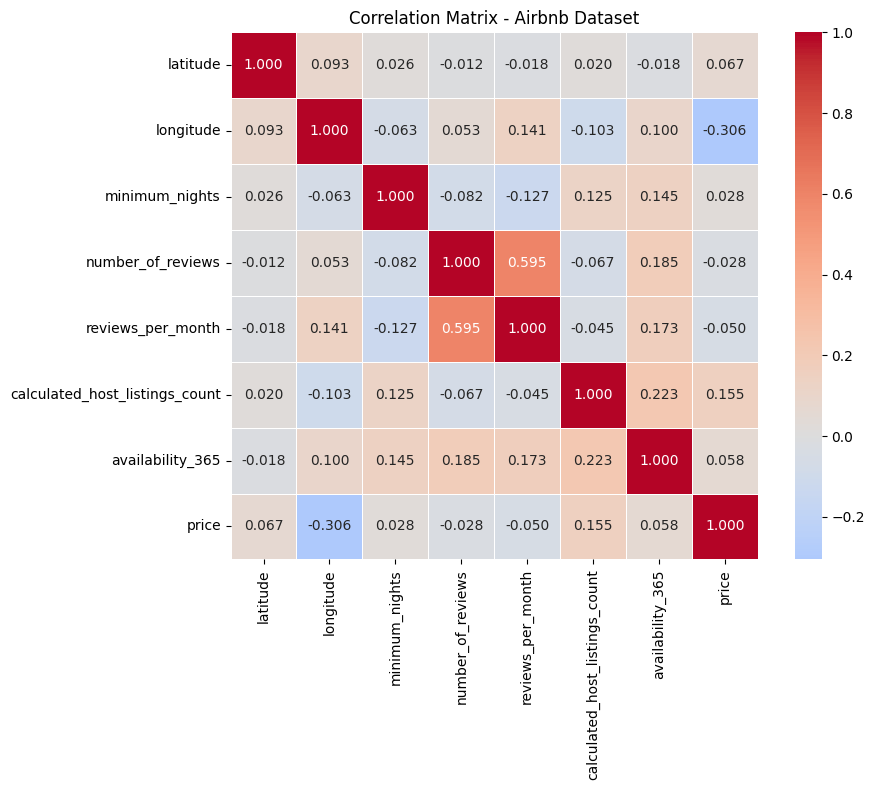

Feature correlation with price amount:
price                             1.000000
calculated_host_listings_count    0.155312
latitude                          0.067296
availability_365                  0.057972
minimum_nights                    0.028076
number_of_reviews                -0.027798
reviews_per_month                -0.050220
longitude                        -0.305698
Name: price, dtype: float64

Strongest positive correlation: calculated_host_listings_count (0.155)
Strongest negative correlation: longitude (-0.306)


In [15]:
# Correlation analysis
corr_num_col = list(num_col)
corr_num_col.remove('price')
corr_num_col.append('price')
plt.figure(figsize=(10, 8))
correlation_matrix = df[corr_num_col].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, fmt='.3f')
plt.title('Correlation Matrix - Airbnb Dataset')
plt.tight_layout()
plt.show()

# Feature correlation with target
target_corr = correlation_matrix['price'].sort_values(ascending=False)
print("Feature correlation with price amount:")
print(target_corr)

# Strongest correlations
print(f"\nStrongest positive correlation: {target_corr.drop('price').idxmax()} ({target_corr.drop('price').max():.3f})")
strongest_negative = target_corr.drop('price').min()
if strongest_negative < 0:
    print(f"Strongest negative correlation: {target_corr.drop('price').idxmin()} ({strongest_negative:.3f})")
else:
    print("No negative correlations found")

### HOT HOT HOT

In [16]:
cat_cols = ['neighbourhood_group', 'room_type']
df_cat = df[cat_cols]
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_cols = encoder.fit_transform(df_cat)
encoded_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(cat_cols))
# df = df.drop(cat_cols,axis=1)
df = pd.concat([df.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45527 entries, 0 to 45526
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   neighbourhood_group                45527 non-null  object 
 1   latitude                           45527 non-null  float64
 2   longitude                          45527 non-null  float64
 3   room_type                          45527 non-null  object 
 4   price                              45527 non-null  int64  
 5   minimum_nights                     45527 non-null  int64  
 6   number_of_reviews                  45527 non-null  int64  
 7   reviews_per_month                  45527 non-null  float64
 8   calculated_host_listings_count     45527 non-null  int64  
 9   availability_365                   45527 non-null  int64  
 10  neighbourhood_group_Bronx          45527 non-null  float64
 11  neighbourhood_group_Brooklyn       45527 non-null  flo

In [17]:
df.rename(columns={'neighbourhood_group_Bronx':'ng_bronx','neighbourhood_group_Brooklyn':'ng_brooklyn','neighbourhood_group_Manhattan':'ng_manhattan','neighbourhood_group_Queens':'ng_queens','neighbourhood_group_Staten Island':'ng_staten_island','room_type_Entire home/apt': 'rt_apt', 'room_type_Private room': 'rt_private_room', 'room_type_Shared room':'rt_shared_room'}, inplace=True)

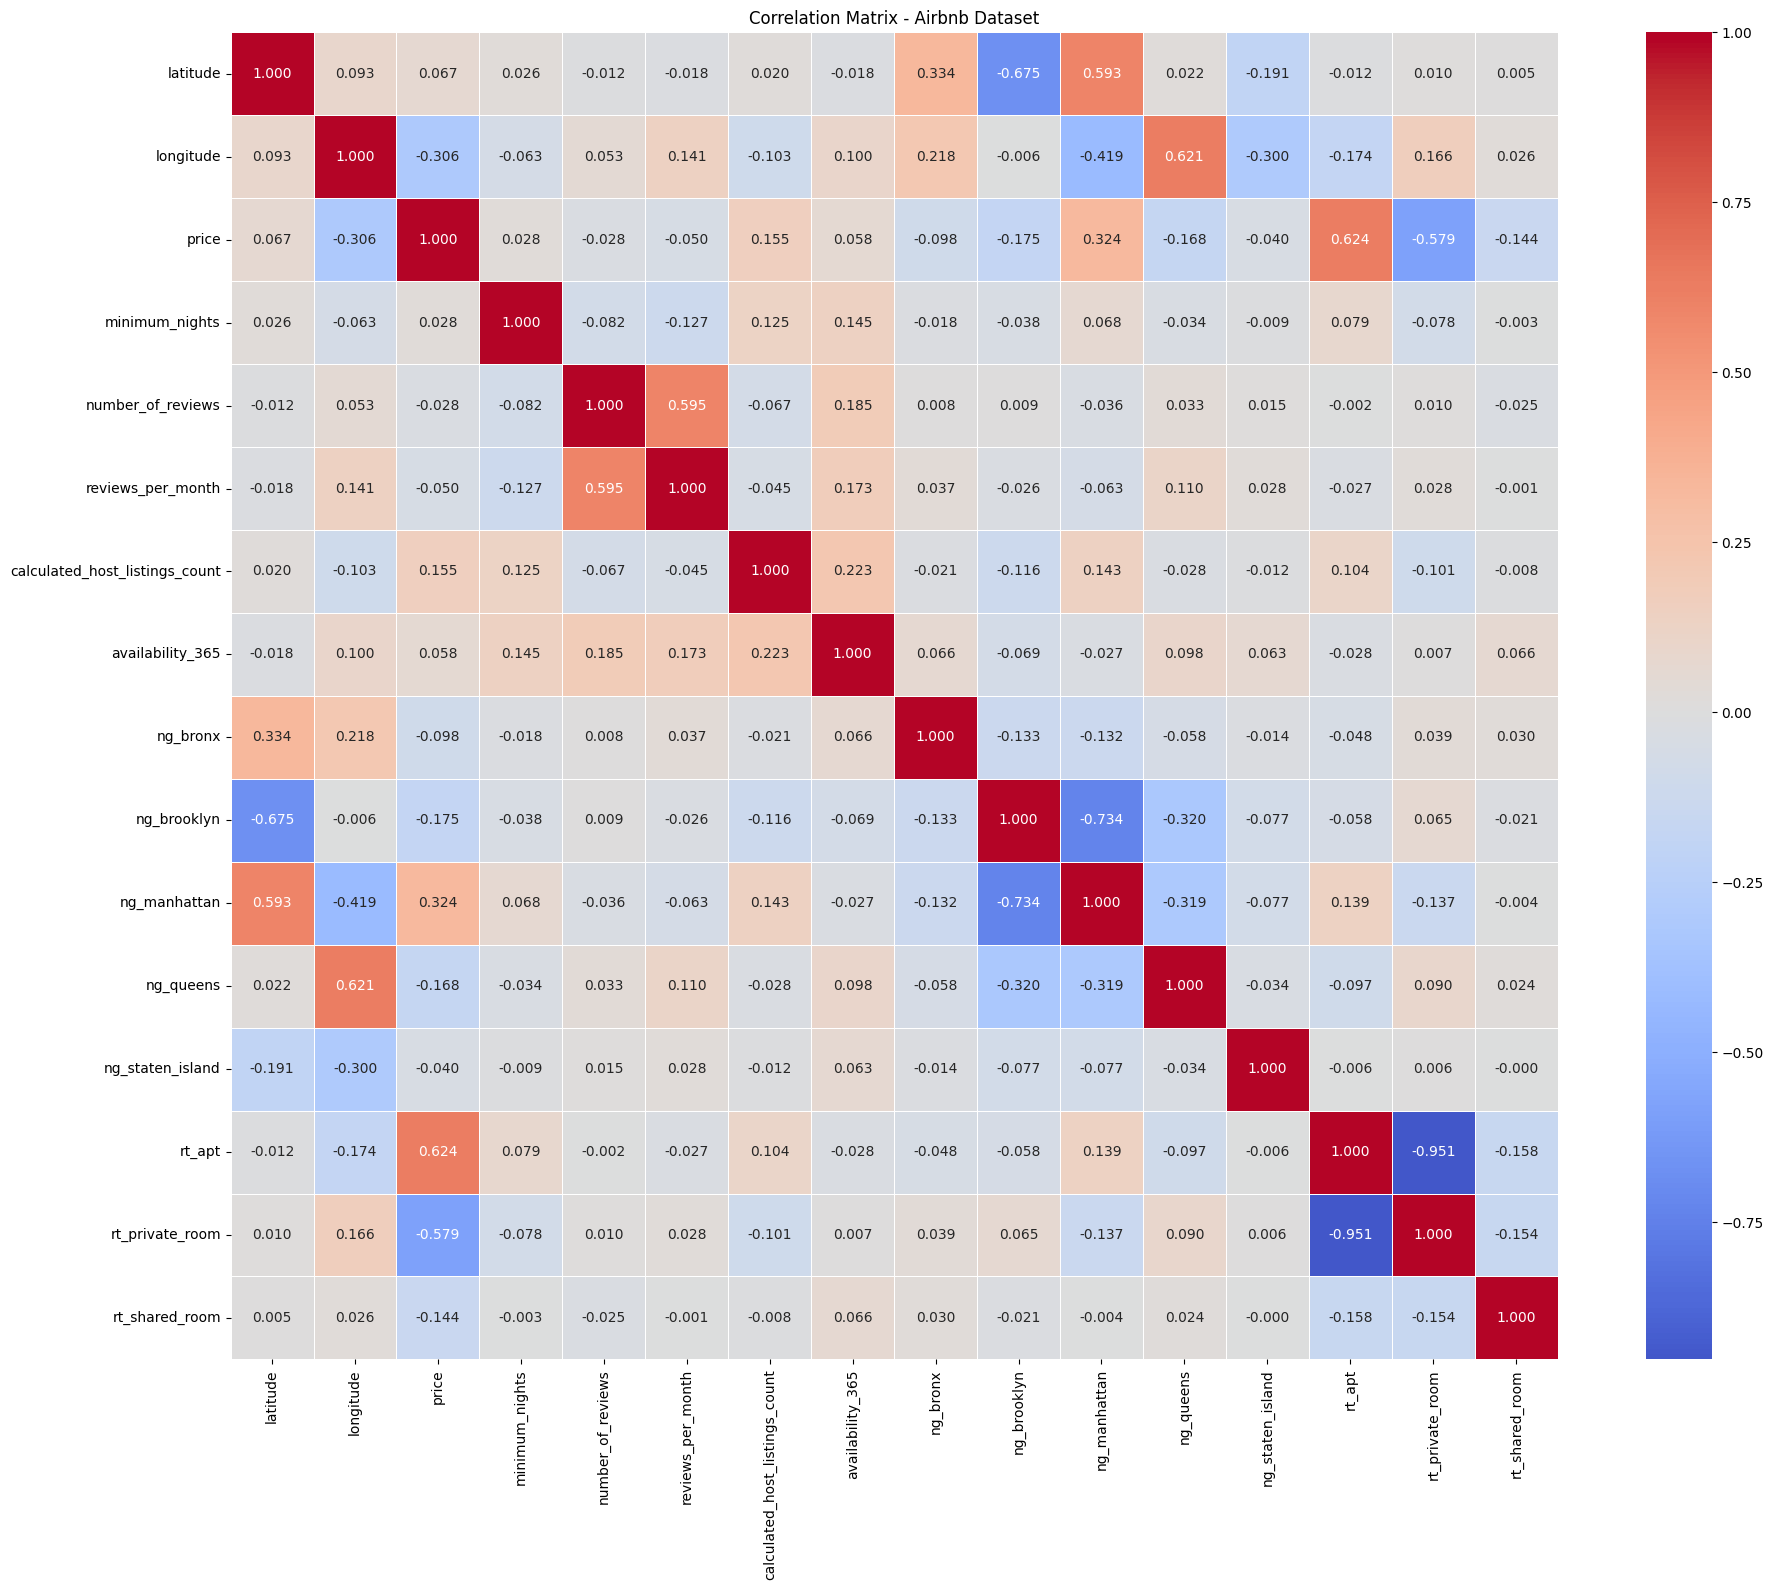

Feature correlation with price amount:
price                             1.000000
rt_apt                            0.623738
ng_manhattan                      0.323814
calculated_host_listings_count    0.155312
latitude                          0.067296
availability_365                  0.057972
minimum_nights                    0.028076
number_of_reviews                -0.027798
ng_staten_island                 -0.039673
reviews_per_month                -0.050220
ng_bronx                         -0.097623
rt_shared_room                   -0.143529
ng_queens                        -0.168366
ng_brooklyn                      -0.174995
longitude                        -0.305698
rt_private_room                  -0.579271
Name: price, dtype: float64

Strongest positive correlation: rt_apt (0.624)
Strongest negative correlation: rt_private_room (-0.579)


In [18]:
# Correlation analysis
num_col = df.select_dtypes(exclude='object').columns
plt.figure(figsize=(20, 16))
correlation_matrix = df[num_col].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, square=True, linewidths=0.5, fmt='.3f')
plt.title('Correlation Matrix - Airbnb Dataset')
plt.tight_layout()
plt.show()

# Feature correlation with target
target_corr = correlation_matrix['price'].sort_values(ascending=False)
print("Feature correlation with price amount:")
print(target_corr)

# Strongest correlations
print(f"\nStrongest positive correlation: {target_corr.drop('price').idxmax()} ({target_corr.drop('price').max():.3f})")
strongest_negative = target_corr.drop('price').min()
if strongest_negative < 0:
    print(f"Strongest negative correlation: {target_corr.drop('price').idxmin()} ({strongest_negative:.3f})")
else:
    print("No negative correlations found")

In [19]:
avg_prices_nbg = df.groupby('neighbourhood_group')['price'].mean().sort_values(ascending=False)
top10N = avg_prices_nbg.head(10)
print(top10N)


neighbourhood_group
Manhattan        143.287797
Brooklyn         104.888923
Staten Island     89.235616
Queens            88.566469
Bronx             76.771107
Name: price, dtype: float64


In [20]:
print("Final report: ")
print("-"*70)
print(f"Shape: {df.shape}")
print("-"*70)
print(f"Info: {df.info()}")
print("-"*70)
print(f"Describe: {df.describe()}")
print(df.isnull().sum())

Final report: 
----------------------------------------------------------------------
Shape: (45527, 18)
----------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45527 entries, 0 to 45526
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             45527 non-null  object 
 1   latitude                        45527 non-null  float64
 2   longitude                       45527 non-null  float64
 3   room_type                       45527 non-null  object 
 4   price                           45527 non-null  int64  
 5   minimum_nights                  45527 non-null  int64  
 6   number_of_reviews               45527 non-null  int64  
 7   reviews_per_month               45527 non-null  float64
 8   calculated_host_listings_count  45527 non-null  int64  
 9   availability_365                45527 n

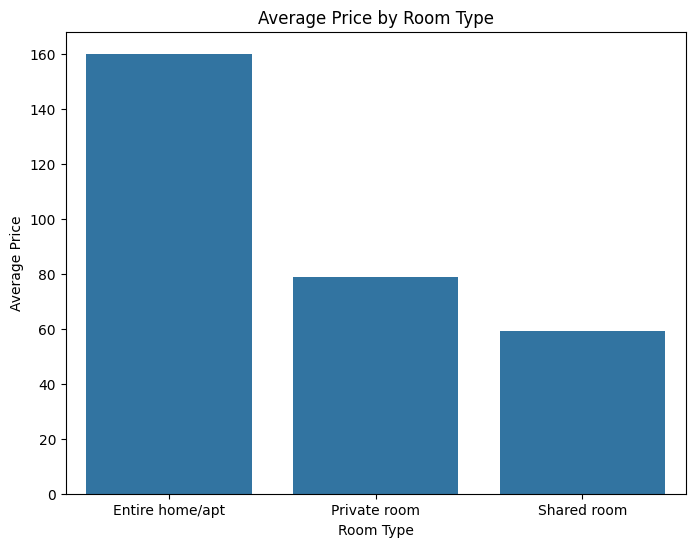

In [21]:
avg_price = df.groupby('room_type')['price'].mean().reset_index()
plt.figure(figsize=(8,6))
sns.barplot(x='room_type', y='price', data=avg_price)
plt.title('Average Price by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.show()


In [22]:
df = df.drop(cat_cols,axis=1)

### Lets Begin, Data!!!!

In [23]:
feature_columns = ['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'ng_bronx', 'ng_brooklyn', 'ng_manhattan', 'ng_queens', 'ng_staten_island', 'rt_apt', 'rt_private_room', 'rt_shared_room']
numerical_columns = ['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']
categorical_columns = ['ng_bronx', 'ng_brooklyn', 'ng_manhattan', 'ng_queens', 'ng_staten_island', 'rt_apt', 'rt_private_room', 'rt_shared_room']
X = df[feature_columns]
y = df['price']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_numerical = X_train[numerical_columns]
X_train_categorical = X_train[categorical_columns]
X_test_numerical = X_test[numerical_columns]
X_test_categorical = X_test[categorical_columns]

#### StandardScaler()

In [25]:
sscaler = StandardScaler()
X_train_scaled_numerical_ss = sscaler.fit_transform(X_train_numerical)
X_test_scaled_numerical_ss = sscaler.transform(X_test_numerical)
X_train_scaled_ss = np.hstack([X_train_scaled_numerical_ss, X_train_categorical])
X_test_scaled_ss = np.hstack([X_test_scaled_numerical_ss, X_test_categorical])


#### MinMaxScaler

In [26]:
mmscaler = MinMaxScaler()
X_train_scaled_numerical_mm = mmscaler.fit_transform(X_train_numerical)
X_test_scaled_numerical_mm = mmscaler.transform(X_test_numerical)
X_train_scaled_mm = np.hstack([X_train_scaled_numerical_mm, X_train_categorical])
X_test_scaled_mm = np.hstack([X_test_scaled_numerical_mm, X_test_categorical])

In [27]:
print(f"Training set size: {X_train_scaled_ss.shape}")
print(f"Test set size: {X_test_scaled_ss.shape}")
print(f"Features: {len(feature_columns)}")
print(f"Target range: {y.min():.2f} - {y.max():.2f}")


Training set size: (36421, 15)
Test set size: (9106, 15)
Features: 15
Target range: 10.00 - 300.00


### Training Time

In [28]:
# Define function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    """
    Evaluate a regression model and return metrics
    """
    # Fit the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate metrics
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    # Cross-validation score
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    cv_mean = cv_scores.mean()
    cv_std = cv_scores.std()
    
    results = {
        'Model': model_name,
        'Train RMSE': train_rmse,
        'Test RMSE': test_rmse,
        'Train MAE': train_mae,
        'Test MAE': test_mae,
        'Train R²': train_r2,
        'Test R²': test_r2,
        'CV R² Mean': cv_mean,
        'CV R² Std': cv_std
    }
    
    return results, y_test_pred


In [29]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=10.0, random_state=42),
    'Lasso Regression': Lasso(alpha=0.01, random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=52, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': xgb.XGBRegressor(random_state=42),
    'LightGBM': lgb.LGBMRegressor(random_state=42, verbose=-1),
    # 'SVR': SVR(kernel='rbf')
}

# Models that need scaled data
scaled_models = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'SVR']

print("Models to be evaluated:")
for i, model_name in enumerate(models.keys(), 1):
    print(f"{i}. {model_name}")


Models to be evaluated:
1. Linear Regression
2. Ridge Regression
3. Lasso Regression
4. Decision Tree
5. Random Forest
6. Gradient Boosting
7. XGBoost
8. LightGBM


In [30]:
# Train and evaluate all models
results_list = []
predictions_dict = {}

print("Training and evaluating models...")
print("-" * 50)

for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    
    # Choose scaled or unscaled data based on model type
    if model_name in scaled_models:
        X_train_use = X_train_scaled_mm
        X_test_use = X_test_scaled_mm
    else:
        X_train_use = X_train
        X_test_use = X_test
    
    # Evaluate model
    results, y_pred = evaluate_model(model, X_train_use, X_test_use, y_train, y_test, model_name)
    results_list.append(results)
    predictions_dict[model_name] = y_pred
    
    print(f"✓ {model_name} - Test R²: {results['Test R²']:.4f}, Test RMSE: {results['Test RMSE']:.4f}")

print("\n" + "-" * 50)
print("All models trained successfully!")


Training and evaluating models...
--------------------------------------------------

Training Linear Regression...
✓ Linear Regression - Test R²: 0.4898, Test RMSE: 47.3618

Training Ridge Regression...
✓ Ridge Regression - Test R²: 0.4879, Test RMSE: 47.4486

Training Lasso Regression...
✓ Lasso Regression - Test R²: 0.4894, Test RMSE: 47.3808

Training Decision Tree...
✓ Decision Tree - Test R²: 0.1984, Test RMSE: 59.3675

Training Random Forest...
✓ Random Forest - Test R²: 0.5718, Test RMSE: 43.3917

Training Gradient Boosting...
✓ Gradient Boosting - Test R²: 0.5675, Test RMSE: 43.6067

Training XGBoost...
✓ XGBoost - Test R²: 0.5811, Test RMSE: 42.9164

Training LightGBM...
✓ LightGBM - Test R²: 0.5873, Test RMSE: 42.5970

--------------------------------------------------
All models trained successfully!


In [31]:
# Create results DataFrame
results_df = pd.DataFrame(results_list)
results_df = results_df.round(4)

# Sort by Test R² score (descending)
results_df = results_df.sort_values('Test R²', ascending=False)

print("Model Performance Comparison:")
print("-" * 105)
print(results_df.to_string(index=False))

# Best performing model
best_model = results_df.iloc[0]['Model']
best_r2 = results_df.iloc[0]['Test R²']
print(f"\n🏆 Best performing model: {best_model} (Test R² = {best_r2:.4f})")


Model Performance Comparison:
---------------------------------------------------------------------------------------------------------
            Model  Train RMSE  Test RMSE  Train MAE  Test MAE  Train R²  Test R²  CV R² Mean  CV R² Std
         LightGBM     40.6590    42.5970    29.4009   30.8875    0.6180   0.5873      0.5780     0.0118
          XGBoost     36.4065    42.9164    26.1112   31.1583    0.6937   0.5811      0.5686     0.0079
    Random Forest     16.4499    43.3917    11.6519   31.3603    0.9375   0.5718      0.5612     0.0086
Gradient Boosting     43.0905    43.6067    31.3784   31.8506    0.5709   0.5675      0.5613     0.0112
Linear Regression     47.2600    47.3618    35.2483   35.2813    0.4839   0.4898      0.4826     0.0135
 Lasso Regression     47.2675    47.3808    35.2627   35.2866    0.4837   0.4894      0.4827     0.0128
 Ridge Regression     47.3093    47.4486    35.2995   35.3192    0.4828   0.4879      0.4819     0.0121
    Decision Tree      0.1853   

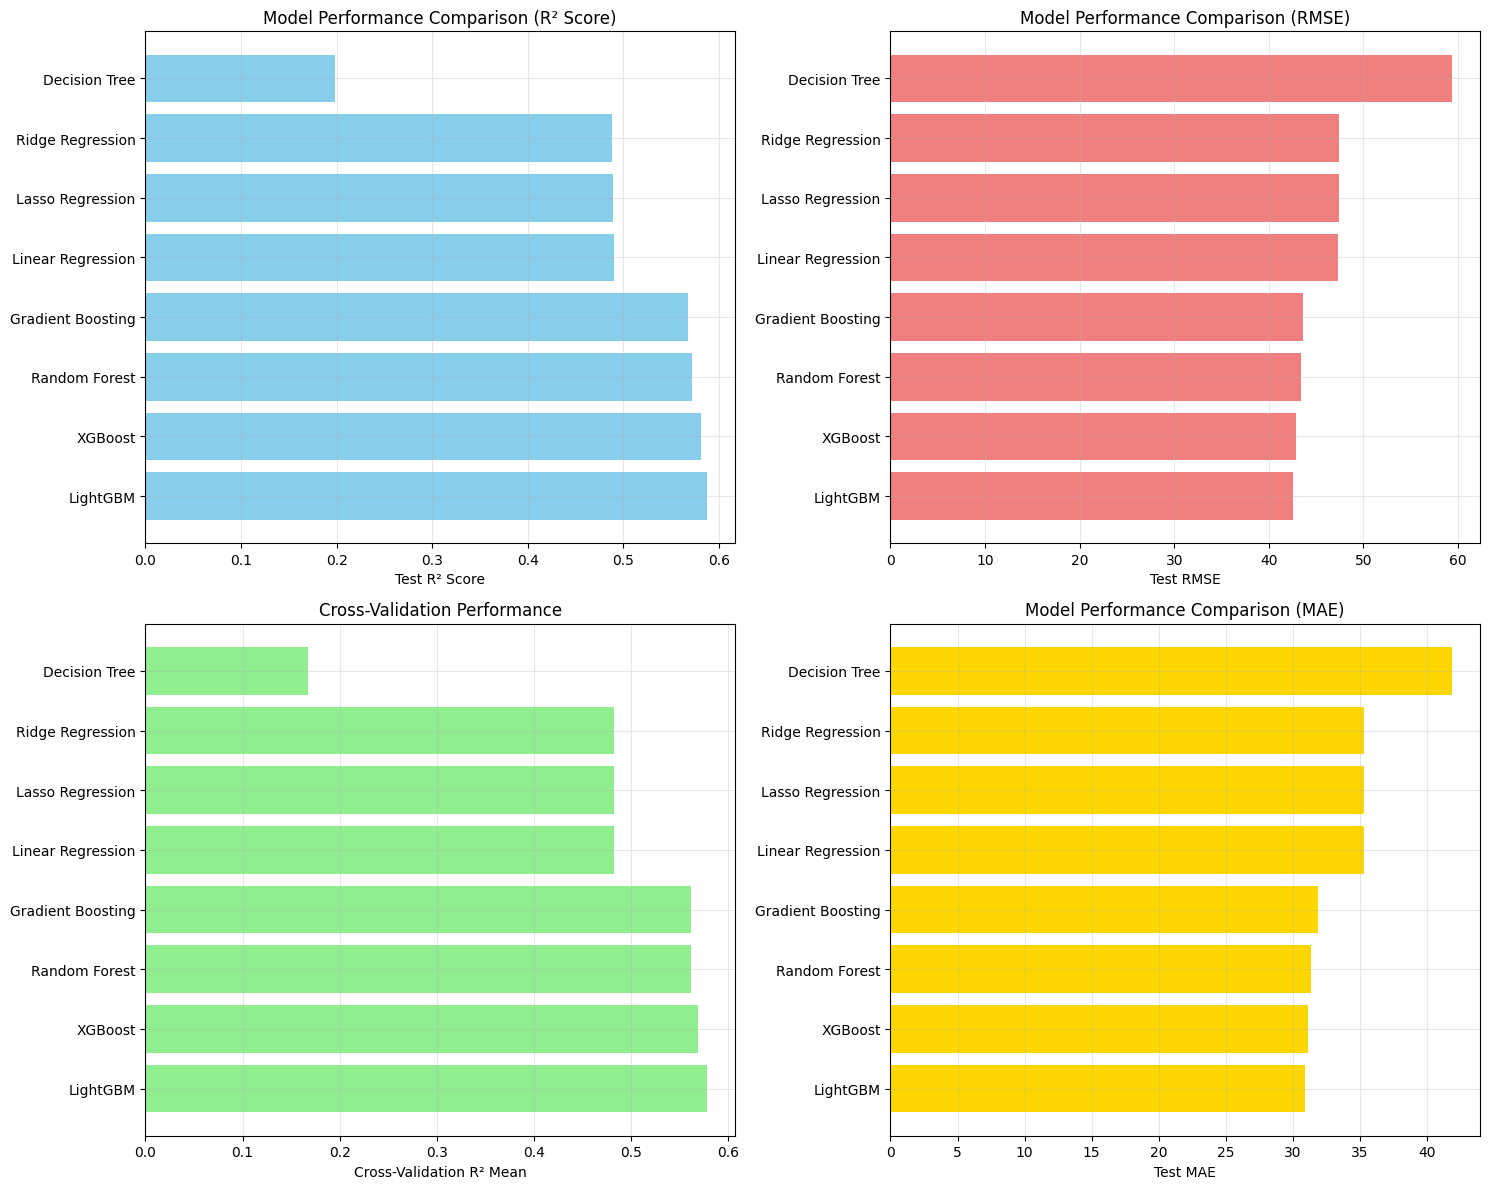

In [32]:
# Visualization of model performance
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# R² Score comparison
axes[0, 0].barh(results_df['Model'], results_df['Test R²'], color='skyblue')
axes[0, 0].set_xlabel('Test R² Score')
axes[0, 0].set_title('Model Performance Comparison (R² Score)')
axes[0, 0].grid(True, alpha=0.3)

# RMSE comparison
axes[0, 1].barh(results_df['Model'], results_df['Test RMSE'], color='lightcoral')
axes[0, 1].set_xlabel('Test RMSE')
axes[0, 1].set_title('Model Performance Comparison (RMSE)')
axes[0, 1].grid(True, alpha=0.3)

# Cross-validation scores
axes[1, 0].barh(results_df['Model'], results_df['CV R² Mean'], color='lightgreen')
axes[1, 0].set_xlabel('Cross-Validation R² Mean')
axes[1, 0].set_title('Cross-Validation Performance')
axes[1, 0].grid(True, alpha=0.3)

# MAE comparison
axes[1, 1].barh(results_df['Model'], results_df['Test MAE'], color='gold')
axes[1, 1].set_xlabel('Test MAE')
axes[1, 1].set_title('Model Performance Comparison (MAE)')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


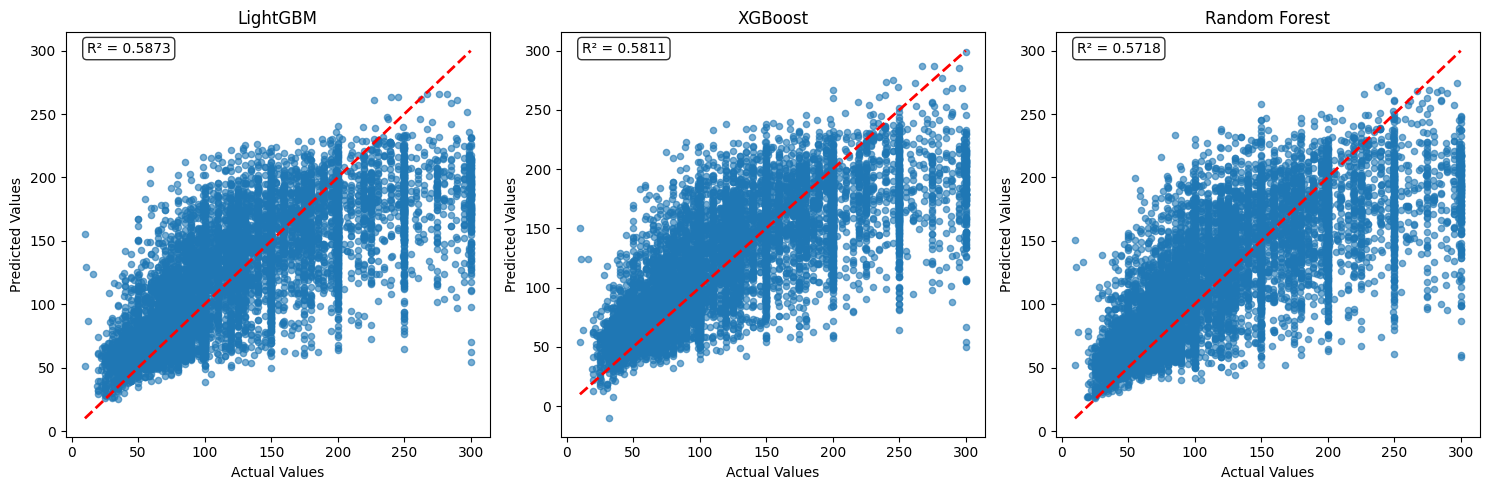

In [36]:
# Prediction vs Actual plots for top 3 models
top_3_models = results_df.head(3)['Model'].tolist()

plt.figure(figsize=(15, 5))
for i, model_name in enumerate(top_3_models, 1):
    plt.subplot(1, 3, i)
    y_pred = predictions_dict[model_name]
    
    plt.scatter(y_test, y_pred, alpha=0.6, s=20)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'{model_name}')
    
    # Add R² score to the plot
    r2 = results_df[results_df['Model'] == model_name]['Test R²'].iloc[0]
    plt.text(0.05, 0.95, f'R² = {r2:.4f}', transform=plt.gca().transAxes, 
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()


## My Inference
• Which model performed best?
- LightGBM. The next best is XGBoost Followed by Random Forest.

• Why might that model be more suitable for this dataset?
- I do not 100 know how LightGBM works. I do have idea of how gradient boosting, so in each iteration it tries to build a new tree that failed to capture the relation until it won't improve. Seeing the 

• How could you improve predictions further (feature engineering, outlier handling, advanced models)?
- Handling outlier or getting more data would bring up acc upto 70~, because there are a lot of outliers and I just dropped them :P. Also the price data is not normally distributed it is skwed, so may be do something with it.
- Finally use more advanced model like Multi-Layer perceptron.

• Diff between StandardScaler vs MinMaxScaler?
- The only diff I could find was in SVR, it had more accuracy in MinMax compared to Standard. don't know why(yet). Hope to learn from you